# Jinlun Zhang 20055835
# Wenqi Tang 20093622
# Eissa Khan 

In [317]:
#Loading libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [318]:
df_train = pd.read_csv("/content/C2T1_Train.csv")
df_test = pd.read_csv("/content/C2T1_Test.csv")
df_train

,encounter_id2,patient_nbr2,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,5283,48330653,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
1,8499,63555809,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
2,9441,42519137,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,20997,89868902,AfricanAmerican,Female,[40-50),?,1,1,7,9,...,No,Steady,No,No,No,No,No,No,Yes,>30
4,28515,82637321,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90761,443840309,100162346,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
90762,443840543,74694092,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
90763,443846909,41088659,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
90764,443849927,31693541,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [319]:
df_train.describe()

,encounter_id2,patient_nbr2,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,9.076600e+04,9.076600e+04,90766.000000,90766.000000,90766.000000,90766.000000,90766.000000,90766.000000,90766.000000,90766.000000,90766.000000,90766.000000,90766.000000
mean,1.628244e+08,5.291868e+07,2.025406,3.775092,5.847267,4.408942,42.848622,1.341868,15.912886,0.347090,0.189730,0.624628,7.379371
std,1.083792e+08,3.954496e+07,1.454453,5.359248,4.147569,2.995873,19.796106,1.704650,8.122734,1.194099,0.930657,1.256617,1.950545
min,5.283000e+03,5.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,7.794063e+07,2.220677e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.402534e+08,4.361397e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.421968e+08,8.681160e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438600e+08,1.895025e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,40.000000,76.000000,21.000000,16.000000


In [320]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90766 entries, 0 to 90765
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id2             90766 non-null  int64 
 1   patient_nbr2              90766 non-null  int64 
 2   race                      90766 non-null  object
 3   gender                    90766 non-null  object
 4   age                       90766 non-null  object
 5   weight                    90766 non-null  object
 6   admission_type_id         90766 non-null  int64 
 7   discharge_disposition_id  90766 non-null  int64 
 8   admission_source_id       90766 non-null  int64 
 9   time_in_hospital          90766 non-null  int64 
 10  payer_code                90766 non-null  object
 11  medical_specialty         90766 non-null  object
 12  num_lab_procedures        90766 non-null  int64 
 13  num_procedures            90766 non-null  int64 
 14  num_medications       

# Missing data handling
Before we proceed further, we should be aware of that the "?" sign is used to represent the NAN values for this dataset. For example, the first 5 'weight' feature values are all '?', meaning that the values are missing

To get rid of the "?" sign, we will replace them with np.nan

In [321]:
df_train = df_train.replace("?",np.nan)
df_test = df_test.replace("?",np.nan)
df_train.head()
# we can see below that the first 5 'weight' feature values has become NaN

,encounter_id2,patient_nbr2,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,5283,48330653,Caucasian,Female,[80-90),NaN,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
1,8499,63555809,Caucasian,Female,[90-100),NaN,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
2,9441,42519137,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,20997,89868902,AfricanAmerican,Female,[40-50),NaN,1,1,7,9,...,No,Steady,No,No,No,No,No,No,Yes,>30
4,28515,82637321,Caucasian,Male,[50-60),NaN,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [322]:
# Checking the % of the missing values in each feature of the training dataset to determine which feature may have too much missing values that may lead any imputation method to produces poor outcome
# display the features with more than 20% missing values

for col in df_train.columns:
  percent_missing = float(df_train[col].isnull().sum() / df_train.shape[0] ) * 100
  if(percent_missing >= 20):
        print(col, percent_missing,"%" )

weight 96.77632593702488 %
payer_code 42.67016283630434 %
medical_specialty 48.117136372650556 %


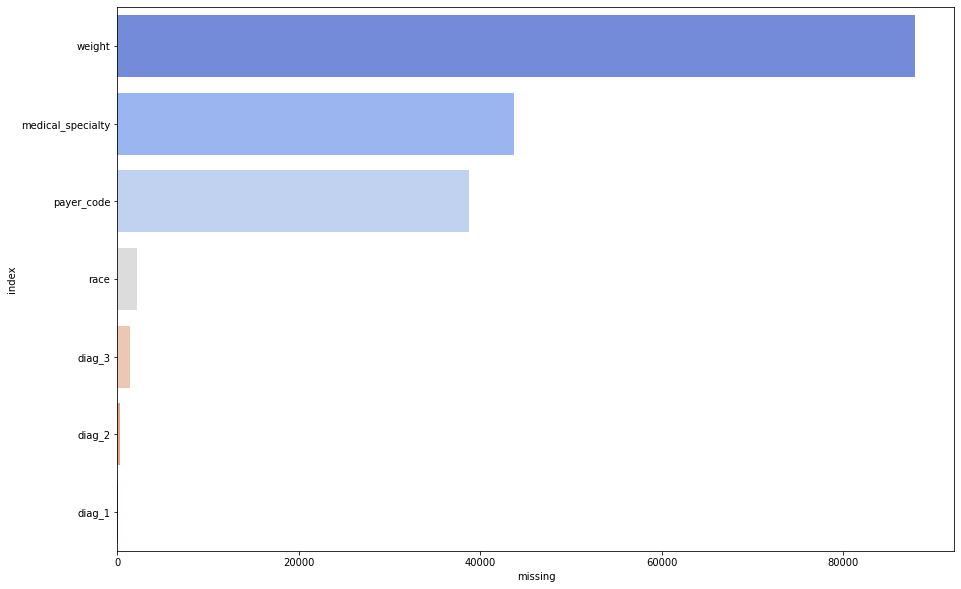

In [323]:
# Plot the missing value count as a bar chart
missing = df_train.isnull().sum()
missing = missing[missing>0]

miss = pd.DataFrame(missing, columns=['missing'])

miss = miss.reset_index()


miss.sort_values(by='missing', ascending=False, inplace=True)

plt.figure(figsize=(15, 10))
sns.barplot(y = miss['index'], x= miss.missing, palette='coolwarm')

## As we can see from above 2 cells, feature 'weight' contains approximate 97% of the missing values, meaning that this feature basically cannot help the model training but add complexity. Hence, we can simply drop the 'weight' feature
### As for the feature 'Payer code' and 'medical specialty', which contains approximate 40% missing values, we may also choose to drop these features to see if we can get a satisfactory model performance without them 
#### Note: 'Payer code' feature may be irrelevant to our target attribute (readmitted), as it just indicates which party pays the treatment bill for the patient

In [324]:
#dropping columns with large number of missing values
df_train.drop(['weight','payer_code','medical_specialty'], axis = 1,inplace=True)
df_test.drop(['weight','payer_code','medical_specialty'], axis = 1,inplace=True)
df_train

,encounter_id2,patient_nbr2,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,5283,48330653,Caucasian,Female,[80-90),2,1,4,13,68,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
1,8499,63555809,Caucasian,Female,[90-100),3,3,4,12,33,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
2,9441,42519137,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,20997,89868902,AfricanAmerican,Female,[40-50),1,1,7,9,47,...,No,Steady,No,No,No,No,No,No,Yes,>30
4,28515,82637321,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90761,443840309,100162346,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,No,Down,No,No,No,No,No,Ch,Yes,>30
90762,443840543,74694092,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,No,Steady,No,No,No,No,No,No,Yes,NO
90763,443846909,41088659,Caucasian,Male,[70-80),1,1,7,1,53,...,No,Down,No,No,No,No,No,Ch,Yes,NO
90764,443849927,31693541,Caucasian,Female,[80-90),2,3,7,10,45,...,No,Up,No,No,No,No,No,Ch,Yes,NO


**Fix missing values in Gender**

**Note: The missing value in gender is represented as 'Unknown/Invalid' as shown below**

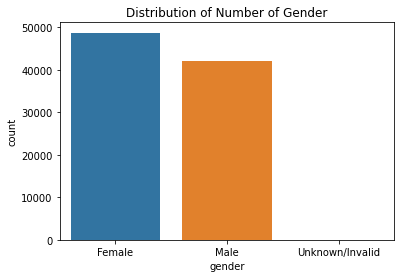

Proportions of Race Value
Female             48748
Male               42015
Unknown/Invalid        3
Name: gender, dtype: int64


In [325]:
sns.countplot(x = "gender", data = df_train)
plt.title("Distribution of Number of Gender")
plt.show()

print("Proportions of Race Value")
print(df_train.gender.value_counts())

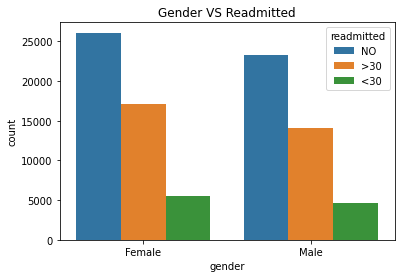

In [326]:
# As we can see from above, since we only has 3 missing values for the 'gender' features, we can simply drop the 3 records with missing gender value
df_train = df_train.drop(df_train.loc[df_train["gender"]=="Unknown/Invalid"].index, axis=0)
df_test = df_test.drop(df_test.loc[df_test["gender"]=="Unknown/Invalid"].index, axis=0)

# Plot the distribution of gender with respect to the target attribute 'readmitted'
sns.countplot(x = "gender", hue = "readmitted", data = df_train)
plt.title("Gender VS Readmitted")
plt.show()


**Fix missing values in Race**

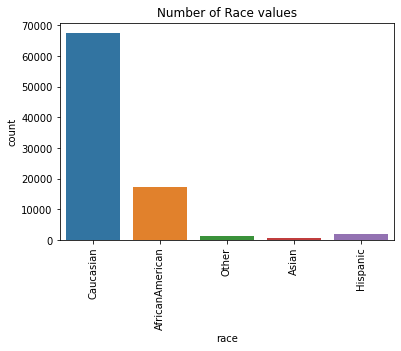

Proportion of Race
Caucasian          6751500
AfricanAmerican    1726700
Hispanic            183400
Other               135700
Asian                58500
Name: race, dtype: int64
['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']


In [327]:
sns.countplot(x=df_train.race, data = df_train)
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race")
print(df_train.race.value_counts()*100)
print(df_train.race.unique())

In [328]:
# Since we have a feature value 'others' in the race feature, we can simply assign the records with missing 'race' value to have the 'other' race feature value
df_train['race'] = df_train['race'].replace(np.nan, 'Other')
df_test['race'] = df_test['race'].replace(np.nan, 'Other')

df_train.race.unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

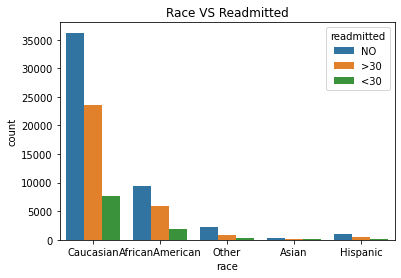

In [329]:
sns.countplot(x="race", hue= "readmitted", data = df_train)
plt.title("Race VS Readmitted")
plt.show()

## Filling missing vales in features 'Diagnosis 1',  'Diagnosis 2', and 'Diagnosis 3' 

In [330]:
# filling in a fixed categorical value 'NaN' for each missing value in the 3 features
diag_list = ['diag_1','diag_2','diag_3']

for col in diag_list:
    df_train[col].fillna('NaN', inplace=True)

# Data Pre-Processing, Feature Engineering, and Visualization

In [331]:
# Encode target attribute
df_train.readmitted.value_counts()

NO     49358
>30    31232
<30    10173
Name: readmitted, dtype: int64

In [332]:
# Encode target attribute with 
# 'No' (not readmitted again) being 0
# '>30' (readmitted to the hospital after 30 days) being 1
# '<30' (readmitted to the hospital within 30 days) being 2

df_train['readmitted'] = df_train['readmitted'].replace(['NO','>30','<30'], [0,1,2])
df_train.readmitted.value_counts()

0    49358
1    31232
2    10173
Name: readmitted, dtype: int64

In [333]:
# NOte: we need to convert the predicted target numeric numbers back to its corresponding nominal values after training the model and made the prediction

**Convert the age feature**

For the feature age, which has 10 unique categorical values, we can convert this categorical feature into numeric one by replacing those age ranges with the middle age for each age range: 

Ex: [0,10) will be replaced by 5


In [334]:
df_train.age.value_counts()

[70-80)     23307
[60-70)     20027
[50-60)     15421
[80-90)     15186
[40-50)      8640
[30-40)      3403
[90-100)     2481
[20-30)      1496
[10-20)       644
[0-10)        158
Name: age, dtype: int64

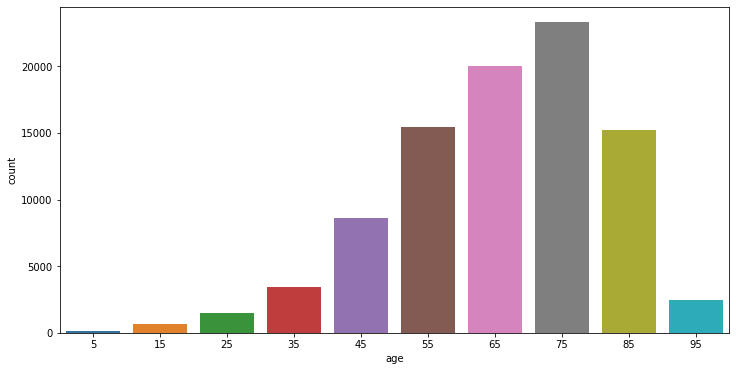

In [335]:
df_train.age = df_train.age.replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

df_test.age = df_test.age.replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

plt.figure(figsize=(12,6))
sns.countplot(x="age", data = df_train)

plt.show()

In [336]:
# Notes from professor (please ignore this cell):
# do not standardize any ordinal data
# standardize based on model selection: no standardize for tree model and standardize for Knn and svm (better)


### Encode the 23 features for medications
The 23 features share the same 4 categorical values:

“up” if the dosage was increased during the encounter, 

“down” if the dosage was decreased, 

“steady” if the dosage did not change, 

and “no” if the drug was not prescribed

We can make

> no: 0

> down: 1

> steady: 2

> up: 3

In [337]:
# get the list of medication
medication = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
              'miglitol', 'citoglipton', 'insulin', 'glyburide-metformin', 'tolazamide', 'examide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 
              'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
df_train[medication]

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,...,glyburide-metformin,tolazamide,examide,metformin-pioglitazone,metformin-rosiglitazone,glimepiride-pioglitazone,glipizide-metformin,troglitazone,tolbutamide,acetohexamide
0,No,No,No,No,No,Steady,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,Steady,No,...,No,No,No,No,No,No,No,No,No,No
2,No,No,No,No,No,Steady,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90761,Steady,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
90762,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
90763,Steady,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
90764,No,No,No,No,No,Steady,No,Steady,No,No,...,No,No,No,No,No,No,No,No,No,No


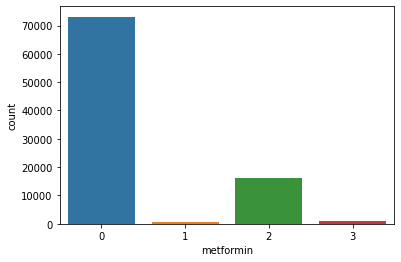

METFORMIN
0    73108
2    16199
3      947
1      509
Name: metformin, dtype: int64


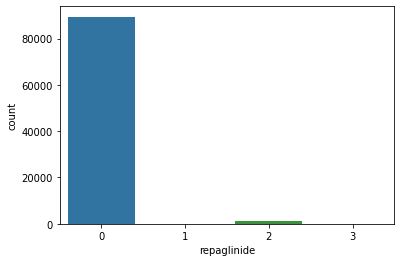

REPAGLINIDE
0    89434
2     1198
3       91
1       40
Name: repaglinide, dtype: int64


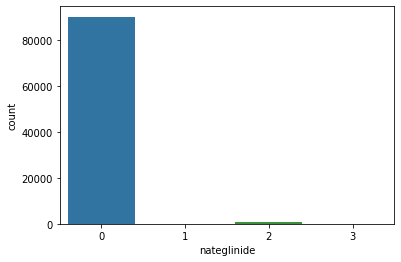

NATEGLINIDE
0    90157
2      574
3       21
1       11
Name: nateglinide, dtype: int64


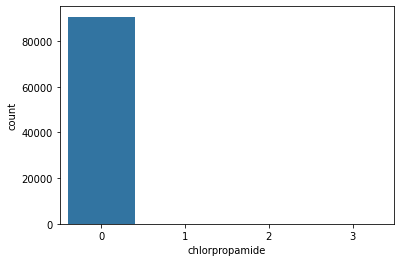

CHLORPROPAMIDE
0    90682
2       74
3        6
1        1
Name: chlorpropamide, dtype: int64


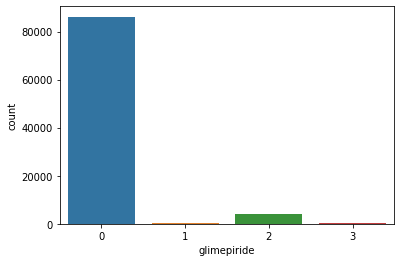

GLIMEPIRIDE
0    86152
2     4142
3      294
1      175
Name: glimepiride, dtype: int64


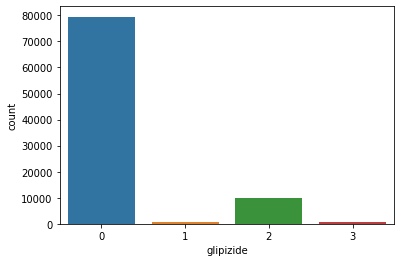

GLIPIZIDE
0    79469
2    10086
3      707
1      501
Name: glipizide, dtype: int64


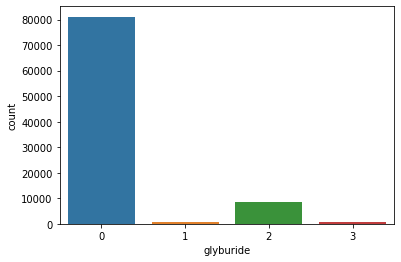

GLYBURIDE
0    81122
2     8397
3      731
1      513
Name: glyburide, dtype: int64


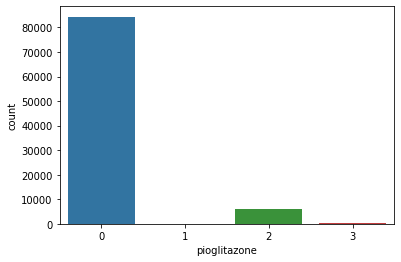

PIOGLITAZONE
0    84385
2     6070
3      207
1      101
Name: pioglitazone, dtype: int64


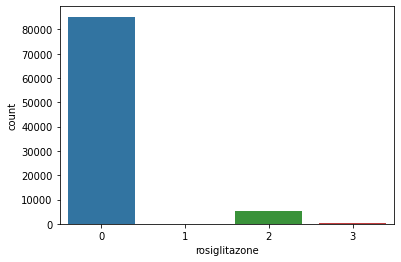

ROSIGLITAZONE
0    85233
2     5298
3      154
1       78
Name: rosiglitazone, dtype: int64


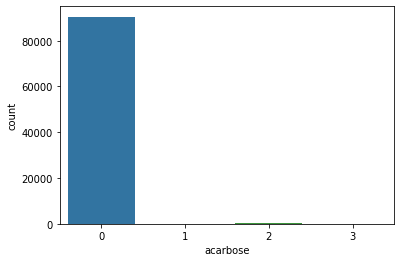

ACARBOSE
0    90492
2      261
3        9
1        1
Name: acarbose, dtype: int64


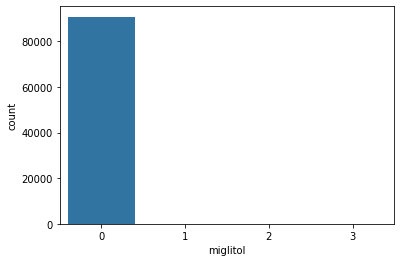

MIGLITOL
0    90730
2       26
1        5
3        2
Name: miglitol, dtype: int64


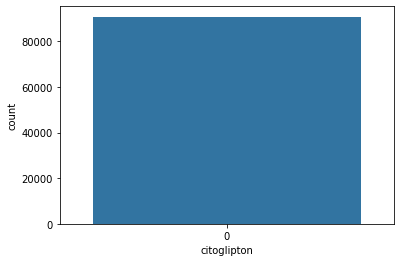

CITOGLIPTON
0    90763
Name: citoglipton, dtype: int64


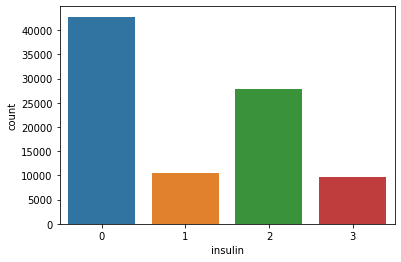

INSULIN
0    42790
2    27876
1    10487
3     9610
Name: insulin, dtype: int64


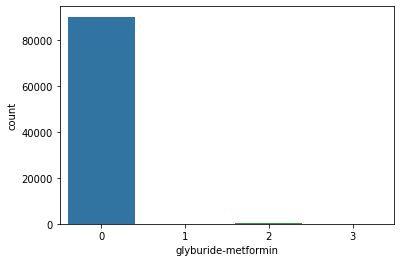

GLYBURIDE-METFORMIN
0    90196
2      554
3        7
1        6
Name: glyburide-metformin, dtype: int64


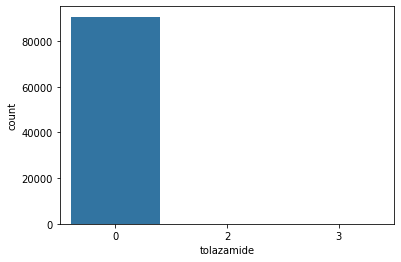

TOLAZAMIDE
0    90724
2       38
3        1
Name: tolazamide, dtype: int64


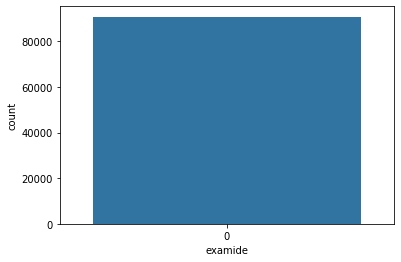

EXAMIDE
0    90763
Name: examide, dtype: int64


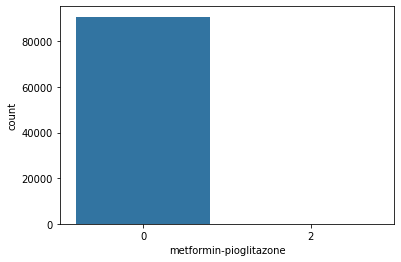

METFORMIN-PIOGLITAZONE
0    90762
2        1
Name: metformin-pioglitazone, dtype: int64


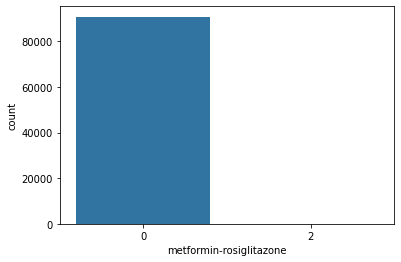

METFORMIN-ROSIGLITAZONE
0    90761
2        2
Name: metformin-rosiglitazone, dtype: int64


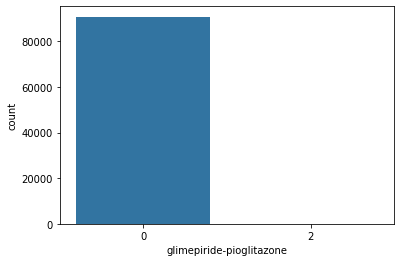

GLIMEPIRIDE-PIOGLITAZONE
0    90762
2        1
Name: glimepiride-pioglitazone, dtype: int64


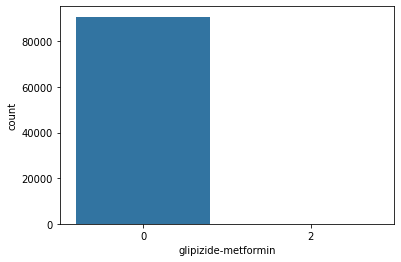

GLIPIZIDE-METFORMIN
0    90755
2        8
Name: glipizide-metformin, dtype: int64


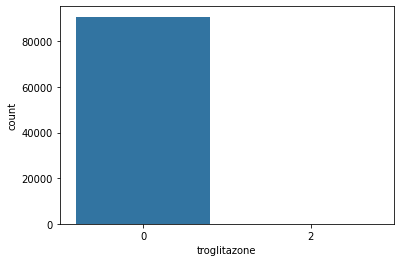

TROGLITAZONE
0    90760
2        3
Name: troglitazone, dtype: int64


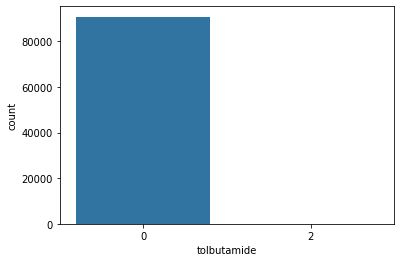

TOLBUTAMIDE
0    90742
2       21
Name: tolbutamide, dtype: int64


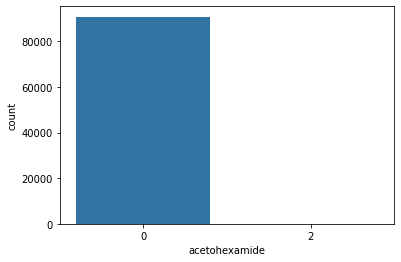

ACETOHEXAMIDE
0    90762
2        1
Name: acetohexamide, dtype: int64


In [338]:
# encode the 4 categorical values into the numeric ordinal values
for i in medication:
    df_train[i] = df_train[i].replace('No', 0)
    df_train[i] = df_train[i].replace('Down', 1)
    df_train[i] = df_train[i].replace('Steady', 2)
    df_train[i] = df_train[i].replace('Up', 3)
    
    df_test[i] = df_test[i].replace('No', 0)
    df_test[i] = df_test[i].replace('Down', 1)
    df_test[i] = df_test[i].replace('Steady', 2)
    df_test[i] = df_test[i].replace('Up', 3)

    # plot the value distribution for each medication feature
    sns.countplot(x = i,                 
                  data = df_train)
    plt.show()
    print(i.upper())
    print(df_train[f"{i}"].value_counts())
    #print(i,"\n", df_train[i].value_counts(), "\n") 
   



In [339]:
# we can see from above that the 'No' value dominate for most of the medication features
# meaning that the model may not learn much from those medication features, except for features like 'insulin' and 'METFORMIN'
# in which the 'No' value is less dominate than it is in the other medication features

# Hence, we will drop out the medication features that cause the situation where the % of training records with that feature value being 'No' > 99% of the total training samples
# as such features can be regarded as “almost-unary” attributes that do not contribute much to the model learning (low variance / info provided) and should be removed for 
# better model generalizability and less computational time

# so that we can supply more meaningful features to the model for learning
medication_valid = []
for i in medication:
  if((df_train[i] == 0).sum() / df_train.shape[0] > 0.99):
    df_train = df_train.drop([i], axis=1)
    df_test = df_test.drop([i], axis=1)
    medication_valid.append(i)
medication_valid    



['nateglinide',
 'chlorpropamide',
 'acarbose',
 'miglitol',
 'citoglipton',
 'glyburide-metformin',
 'tolazamide',
 'examide',
 'metformin-pioglitazone',
 'metformin-rosiglitazone',
 'glimepiride-pioglitazone',
 'glipizide-metformin',
 'troglitazone',
 'tolbutamide',
 'acetohexamide']

### Convert the categorical feature "Glucose serum test result" (max_glu_serum) into numeric one

Same encoding strategy with 'medication' can be used for this feature:

>None:  0

>Norm:  1

>">200": 2    

>">300": 3 

In [340]:
df_train.max_glu_serum.value_counts()

None    85578
Norm     2545
>200     1463
>300     1177
Name: max_glu_serum, dtype: int64

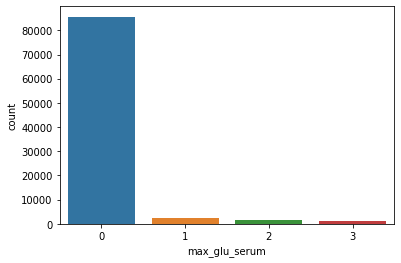

0    85578
1     2545
2     1463
3     1177
Name: max_glu_serum, dtype: int64


In [341]:
# encoding the "max_glu_serum" feature
df_train["max_glu_serum"] = df_train["max_glu_serum"].replace({"None":0, "Norm":1, ">200":2, ">300":3}) 
df_test["max_glu_serum"] = df_test["max_glu_serum"].replace({"None":0, "Norm":1, ">200":2, ">300":3}) 

sns.countplot(x = "max_glu_serum", data = df_train)
plt.show()

print(df_train.max_glu_serum.value_counts())

# as shown below, the value 0 or None dominates, meaning this feature does not give much useful info for prediction / training / model learning

### Convert categorical feature "A1c test result" into numeric one
> “none”: 0 

> “normal”: 1

> “>7”: 2

> “>8”: 3


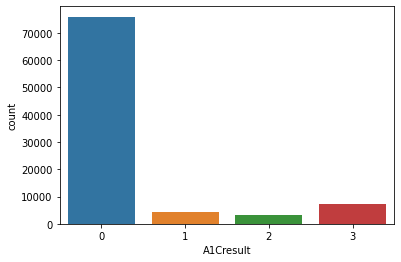

0    75924
3     7329
1     4231
2     3279
Name: A1Cresult, dtype: int64


In [342]:
# Similar procedure with feature "max_glu_serum"
df_train["A1Cresult"] = df_train["A1Cresult"].replace({"None":0, "Norm":1, ">7":2, ">8":3})
df_test["A1Cresult"] = df_test["A1Cresult"].replace({"None":0, "Norm":1, ">7":2, ">8":3})

sns.countplot(x = "A1Cresult", data = df_train)
plt.show()

print(df_train.A1Cresult.value_counts())
# again, as shown below, the value 0 or None dominates, meaning this feature does not give much useful info for prediction / training / model learning

## Convert the 3 binary categorical features ('Gender', 'Change of medications' and 'Diabetes medications') into binary numeric attributes

For 'Gender':

> Male: 1

> Female: 0

For 'Change of medications':

> Ch: 1

> No: 0

For 'Diabetes medications':

> Yes: 1

> No: 0


In [343]:
df_train.gender.value_counts()

Female    48748
Male      42015
Name: gender, dtype: int64

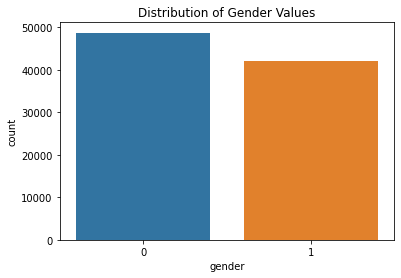

0    48748
1    42015
Name: gender, dtype: int64

In [344]:
df_train['gender'] = df_train['gender'].replace({'Male':1, 'Female':0})
df_test['gender'] = df_test['gender'].replace({'Male':1, 'Female':0})

sns.countplot(x = "gender", data = df_train)
plt.title("Distribution of Gender Values")
plt.show()

df_train.gender.value_counts()

In [345]:
df_train.change.value_counts()

No    49654
Ch    41109
Name: change, dtype: int64

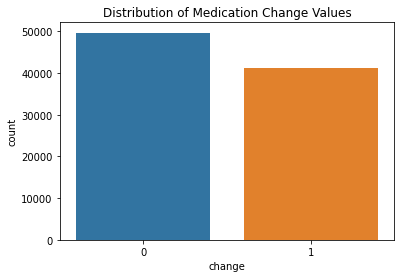

0    49654
1    41109
Name: change, dtype: int64

In [346]:
df_train['change']=df_train['change'].replace({'No': 0, 'Ch':1})
df_test['change']=df_test['change'].replace({'No': 0, 'Ch':1})

sns.countplot(x = "change", data = df_train)
plt.title("Distribution of Medication Change Values")
plt.show()

df_train.change.value_counts()

In [347]:
df_train.diabetesMed.value_counts()

Yes    69571
No     21192
Name: diabetesMed, dtype: int64

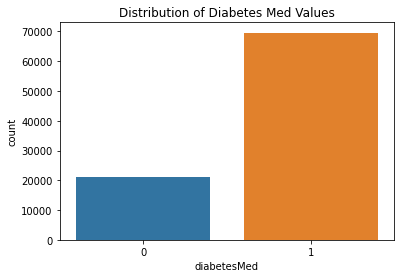

1    69571
0    21192
Name: diabetesMed, dtype: int64

In [348]:
df_train['diabetesMed']=df_train['diabetesMed'].replace({'Yes': 1, 'No': 0})
df_test['diabetesMed']=df_test['diabetesMed'].replace({'Yes': 1, 'No': 0})

sns.countplot(x = "diabetesMed", data = df_train )
plt.title("Distribution of Diabetes Med Values")
plt.show()

df_train.diabetesMed.value_counts()


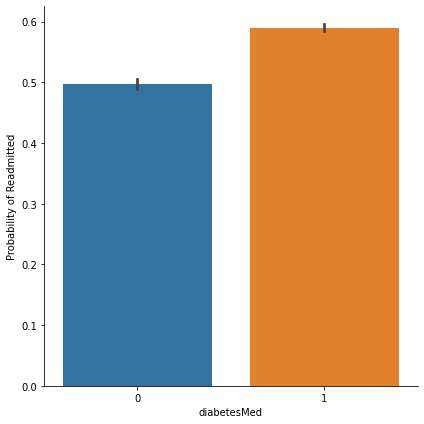

In [349]:
# we can also try to plot the probability of readmitted by just considering the single feature 'diabetesMed' values
g = sns.catplot(x = "diabetesMed", y="readmitted", 
            data = df_train, height = 6, kind ="bar")
g.set_ylabels("Probability of Readmitted")
plt.show()

## Convert 'Race' feature into numeric one by using the one-hot technique

In [350]:
dummies_race_train = pd.get_dummies(df_train['race'],prefix='race')
dummies_race_test = pd.get_dummies(df_test['race'],prefix='race')
dummies_race_train

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
90761,1,0,0,0,0
90762,1,0,0,0,0
90763,0,0,1,0,0
90764,0,0,1,0,0


In [351]:
df_train = pd.concat([df_train, dummies_race_train], axis=1)      
df_train = df_train.drop(['race'], axis=1)

df_test = pd.concat([df_test, dummies_race_test], axis=1)      
df_test = df_test.drop(['race'], axis=1)

df_test

,encounter_id,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,rosiglitazone,insulin,change,diabetesMed,readmitted,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other
0,168899775,88565423,1,65,3,1,1,2,3,3,...,0,0,1,1,NaN,0,0,1,0,0
1,168901359,88590695,1,65,5,1,1,1,7,0,...,0,0,0,1,NaN,0,0,1,0,0
2,168903045,61086362,0,75,1,1,1,2,37,0,...,0,0,0,0,NaN,1,0,0,0,0
3,168903927,85993970,1,75,1,1,7,2,49,0,...,0,2,0,1,NaN,0,0,1,0,0
4,168904515,45884291,1,55,2,1,2,5,4,3,...,0,1,1,1,NaN,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,206091009,93935111,0,65,3,1,1,2,35,0,...,0,2,0,1,NaN,0,0,1,0,0
10996,206098845,112735382,1,75,3,1,1,1,42,6,...,0,0,0,0,NaN,0,0,1,0,0
10997,206100591,89262995,1,75,3,1,1,5,60,1,...,0,1,1,1,NaN,0,0,1,0,0
10998,206117205,106914191,1,85,1,6,7,8,53,2,...,0,3,1,1,NaN,0,0,1,0,0


## Convert the categorical feature 'Diagnosis 1',  'Diagnosis 2', and 'Diagnosis 3' into numeric features

Those 3 features have many distinct codes as values, and those codes are referred to be the first three digits of ICD9 codes. The details about matching code to the corresponding health problem can be found at: https://en.wikipedia.org/wiki/List_of_ICD-9_codes   

In [352]:
# we first need to convert the codes that contain letter 'V' or 'E' into numeric values
# so that we can convert the data type of the 3 diagnosis features into int
# According to https://en.wikipedia.org/wiki/List_of_ICD-9_codes_E_and_V_codes:_external_causes_of_injury_and_supplemental_classification
# the codes that contain letter 'V' or 'E' represent Supplementary Classification of Problems,
# so we can simply assign them to the same numeric value 0, which means 'others'

# This function accepts a dataframe and a feature
# It replaces each code in the supplied diag feature that starts with 'V' or 'E' with the number '-1' 
def remove_ve(df, diag):
    df.loc[(df[diag].str.contains("V")) | (df[diag].str.contains("E")), diag] = -1 # replace code statring with 'V' or 'E' with the number '-1' 
    df[diag] = df[diag].astype(np.float16) # convert all codes in the supplied diag feature into float type
    return df[diag]



In [353]:
for diag in diag_list:
  df_train[diag] = remove_ve(df_train, diag)
  df_test[diag] = remove_ve(df_test, diag)
#df_train["diag_1"].unique()

array([398. , 434. , 197. , 250.8, 414. , 157. , 428. , 518. , 648. ,
       999. , 410. , 682. , 402. , 737. , 276. , 572. ,  -1. , 189. ,
       786. , 427. , 996. , 277. , 584. , 462. , 473. , 411. , 174. ,
       486. , 998. , 511. , 432. , 626. , 295. ,   8. , 196. , 250.6,
       618. , 182. , 845. , 423. , 808. , 250.4, 722. , 403. , 250.1,
       784. , 707. , 440. , 151. , 715. , 997. , 198. , 564. , 812. ,
        38. , 590. , 556. , 578. , 433. , 569. , 185. , 536. , 255. ,
       599. , 558. , 574. , 250.9, 491. , 560. , 244. , 250. , 577. ,
       730. , 188. , 824. , 332. , 562. , 291. , 296. , 510. , 401. ,
       263. , 438. ,  70. , 493. , 642. , 625. , 571. , 738. , 593. ,
       807. , 456. , 446. , 575. , 820. , 515. , 780. , 250.2, 995. ,
       235. , 721. , 787. , 162. , 724. , 282. , 514. , 281. , 530. ,
       466. , 435. , 789. , 566. , 822. , 191. , 557. , 733. , 455. ,
       711. , 482. , 202. , 280. , 553. , 225. , 154. , 441. , 349. ,
         nan, 962. ,

In [355]:
# we define 1 function for converting the 3 diagnosis features into numeric
def transform_diag(diag_value):
  
  if diag_value>=1 and diag_value<=139:
      code = 1  # Infectious and Parasitic Diseases
  
  elif diag_value>=140 and diag_value<=239:
      code = 2  # Neoplasms
  elif diag_value>=240 and diag_value<=279:
      code = 3  # Endocrine, Nutritional and Metabolic Diseases, 
                    #and Immunity Disorders
  elif diag_value>=280 and diag_value<=289:
      code = 4  # Diseases of the Blood and Blood-forming Organs
  elif diag_value>=290 and diag_value<=319:
      code = 5  # Mental Disorders
  elif diag_value>=320 and diag_value<=389:
      code = 6  # Diseases of the Nervous System and Sense Organs
  elif diag_value>=390 and diag_value<=459:
      code = 7  # Diseases of the Circulatory System
  elif diag_value>=460 and diag_value<=519:
      code = 8  # Diseases of the Respiratory System
  elif diag_value>=520 and diag_value<=579:
      code = 9  # Diseases of the Digestive System
  elif diag_value>=580 and diag_value<=629:
      code = 10 # Diseases of the Genitourinary System      
  elif diag_value>=630 and diag_value<=679:
      code = 11 # Complications of Pregnancy, 
                    # Childbirth, and the Puerperium
  elif diag_value>=680 and diag_value<=709:
      code = 12 # Diseases of the Skin and Subcutaneous Tissue
  elif diag_value>=710 and diag_value<=739:
      code = 13 # Diseases of the Musculoskeletal System and Connective Tissue
  elif diag_value>=740 and diag_value<=759:
      code = 14 # Congenital Anomalies
  elif diag_value>=760 and diag_value<=779:
      code = 15 # Certain Conditions originating in the Perinatal Period
  elif diag_value>=780 and diag_value<=799:
      code = 16 # Symptoms, Signs and Ill-defined Conditions
  elif diag_value>=800 and diag_value<=999:
      code = 17 # Injury and Poisoning
  elif diag_value==-1: # codes start with 'V' or 'E' with the number '-1' 
      code = 0  # Supplementary Classification of External Causes of Injury and Poisoning
                    # Supplementary Classification of Factors influencing Health Status and Contact with Health Services
  else: # assigne nan to diag_value 9
      code = 18 
  
  return code

In [356]:
for diag in diag_list:
    df_train[diag] = df_train[diag].apply(transform_diag)
    df_test[diag] = df_test[diag].apply(transform_diag)


In [358]:
# Ensure all the Dtype have become int64 (numeric type)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90763 entries, 0 to 90765
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   encounter_id2             90763 non-null  int64
 1   patient_nbr2              90763 non-null  int64
 2   gender                    90763 non-null  int64
 3   age                       90763 non-null  int64
 4   admission_type_id         90763 non-null  int64
 5   discharge_disposition_id  90763 non-null  int64
 6   admission_source_id       90763 non-null  int64
 7   time_in_hospital          90763 non-null  int64
 8   num_lab_procedures        90763 non-null  int64
 9   num_procedures            90763 non-null  int64
 10  num_medications           90763 non-null  int64
 11  number_outpatient         90763 non-null  int64
 12  number_emergency          90763 non-null  int64
 13  number_inpatient          90763 non-null  int64
 14  diag_1                    90763 non-nu

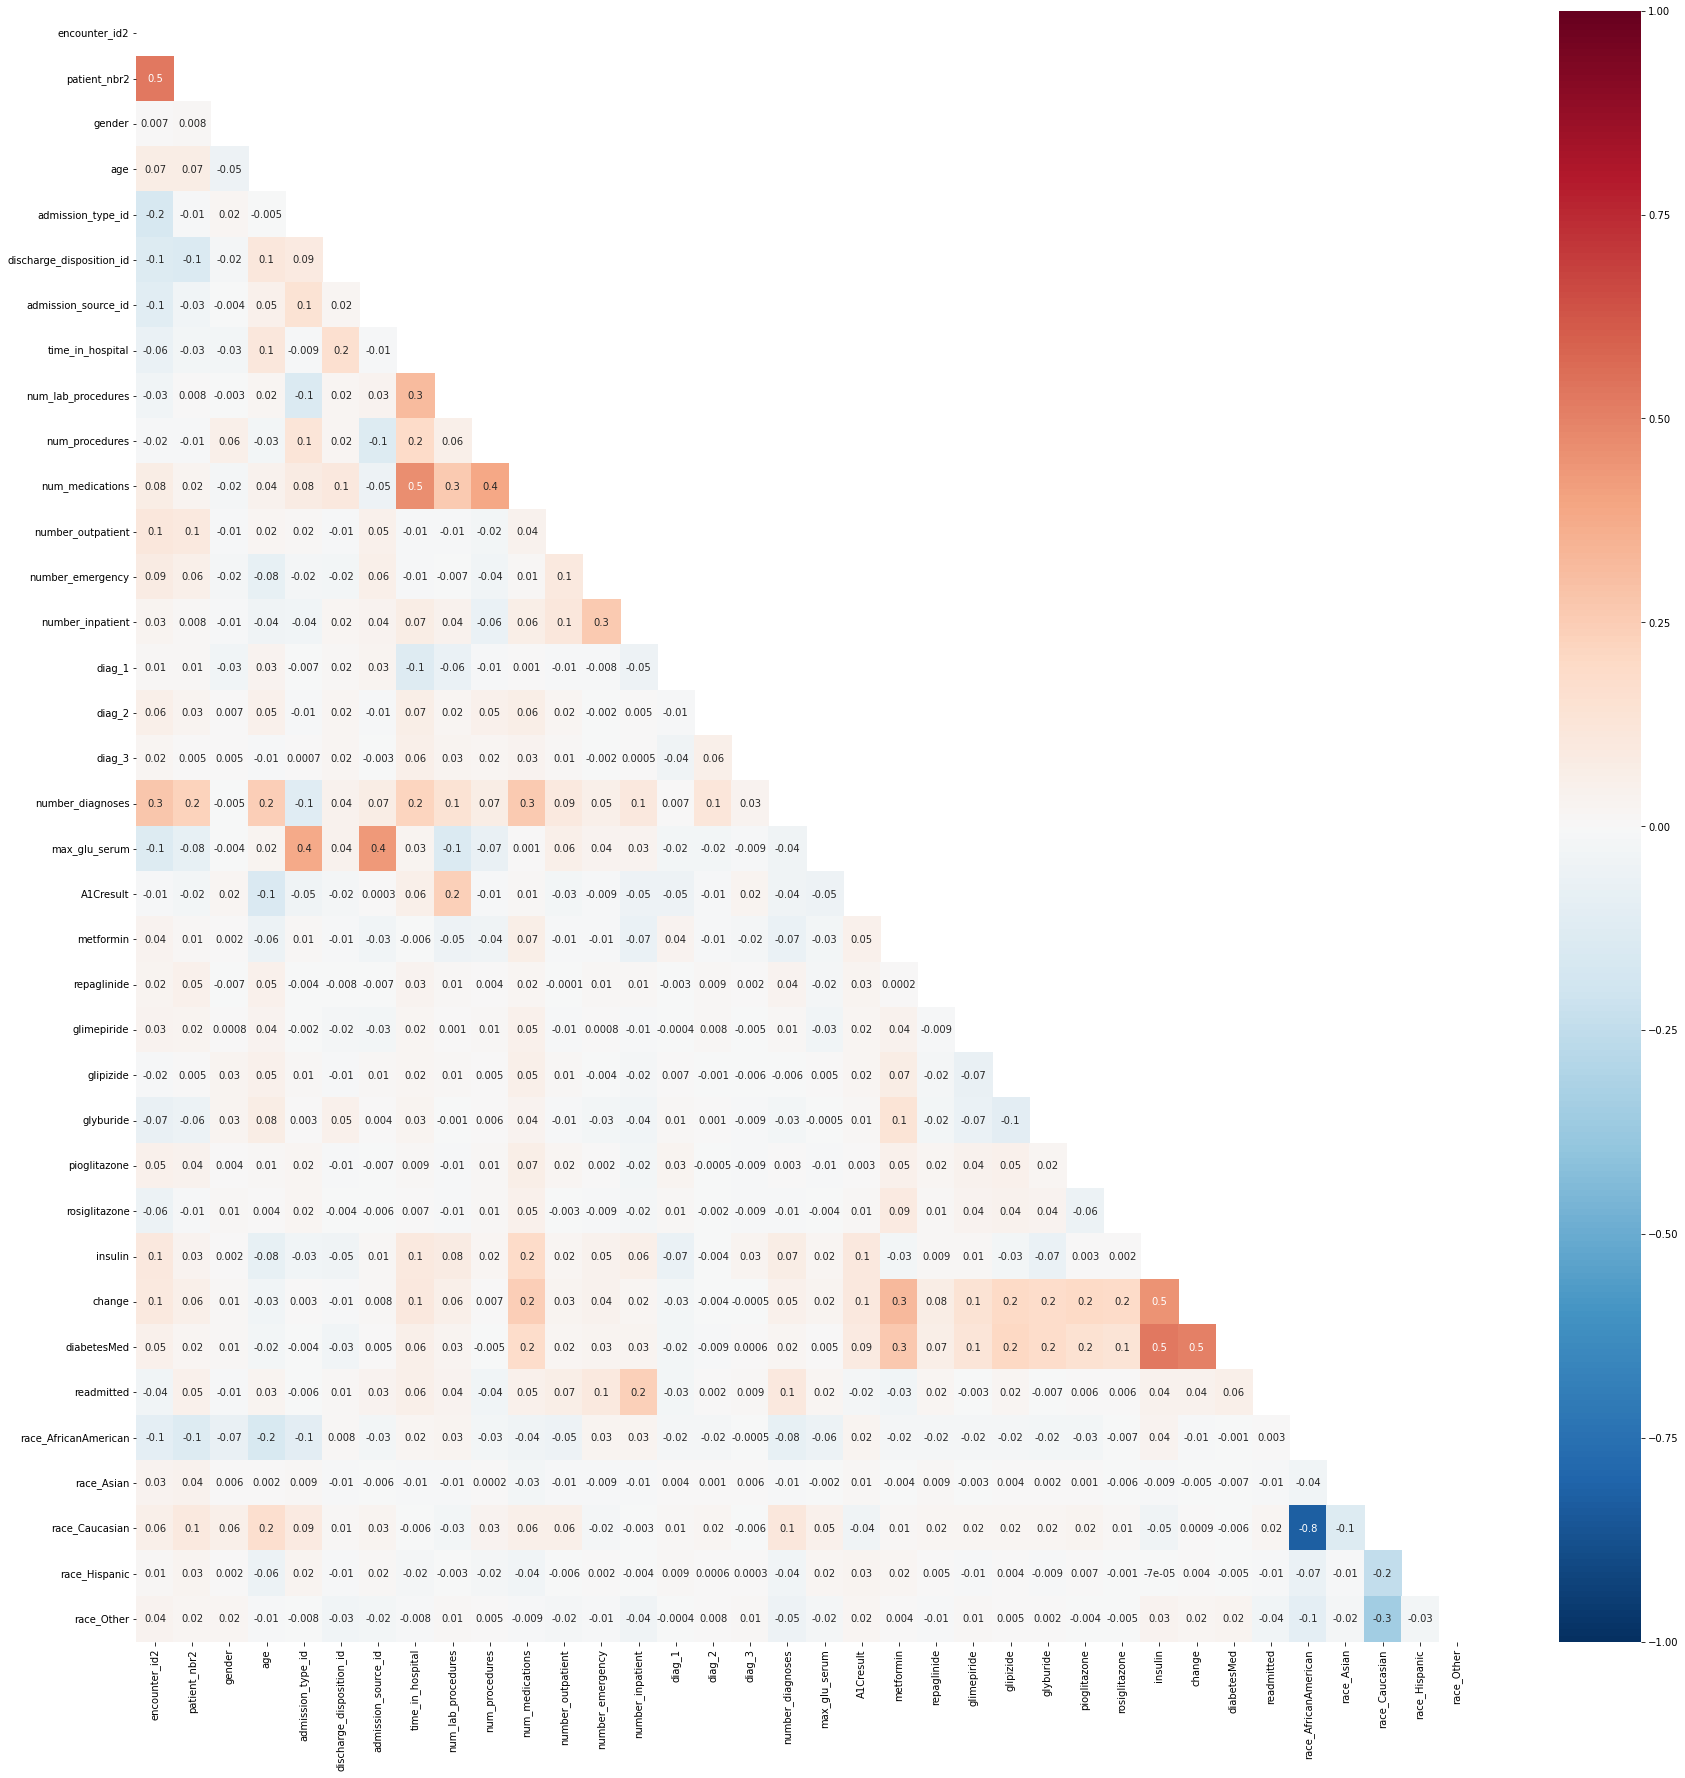

In [359]:
# heatmap of the correlation matrix of all the features (since all categorical features have been converted into numeric)
matrix = np.triu(df_train.corr())
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(df_train.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()

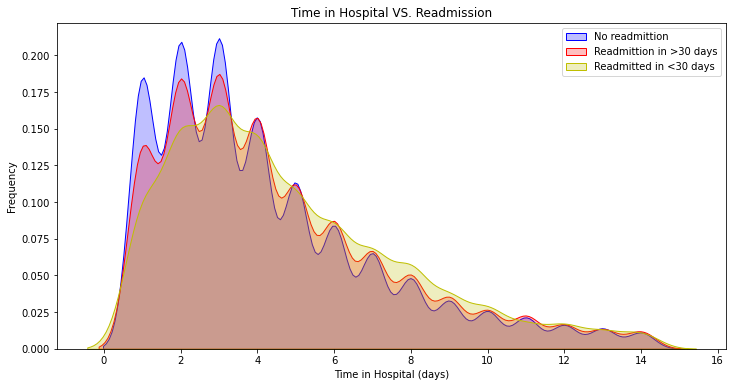

In [360]:
# Time in Hospital and Readmission
fig = plt.figure(figsize=(12,6))
ax=sns.kdeplot(df_train.loc[(df_train['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='No readmittion')
ax=sns.kdeplot(df_train.loc[(df_train['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmittion in >30 days')
ax=sns.kdeplot(df_train.loc[(df_train['readmitted'] == 2),'time_in_hospital'] , color='y',shade=True, label='Readmitted in <30 days')
ax.set(xlabel='Time in Hospital (days)', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')
ax.legend(loc="upper right")

# Model Training

In [361]:
# get the training and validation sets
from sklearn.model_selection import train_test_split
xy_train, xy_validation = train_test_split(
    df_train, test_size=0.3)


In [362]:
# now we can separate the target and ID attributes from the dataframe
y_train = xy_train['readmitted']
y_validation = xy_validation['readmitted']

x_train = xy_train.drop(['readmitted', 'encounter_id2',	'patient_nbr2' ], axis=1)
x_validation = xy_validation.drop(['readmitted', 'encounter_id2',	'patient_nbr2' ], axis=1)


df_test = df_test.drop(['readmitted', 'encounter_id',	'patient_nbr' ], axis=1)


24904    0
17898    0
53654    2
85474    0
74393    2
        ..
5234     0
75629    1
501      0
2257     0
3345     0
Name: readmitted, Length: 63534, dtype: int64

In [364]:
#Y = df_train['readmitted'].apply(to_cat_target)
#X = df_train[df_train.columns.drop('readmitted')]

import xgboost as xgb


xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=32)
xgb_model.fit(x_train, y_train)



XGBClassifier(objective='multi:softprob', random_state=32)

In [365]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Y = df_test['readmitted'].apply(to_cat)
#X = df_test[df_train.columns]
y_pred_val = xgb_model.predict(x_validation)

print(confusion_matrix(y_validation, y_pred_val))
print("\n Accuracy is: ", accuracy_score(y_validation, y_pred_val))
#print(xgb_model.score(y_validation, y_pred_val))


[[12857  1868    12]
 [ 6434  2963    40]
 [ 1984  1025    46]]

 Accuracy is:  0.5826875757464468


In [366]:
# get the prediction of test set
y_pred_test = xgb_model.predict(df_test)

y_pred_test

array([0, 0, 1, ..., 0, 1, 1])

In [374]:
# write the prediction of test set into a different test file /content/C2T1_Test.csv
df_test = pd.read_csv("/content/C2T1_Test.csv")
y_pred_test = pd.DataFrame(y_pred_test, columns= ['readmitted'])
df_test['readmitted'] = y_pred_test['readmitted'].replace([0,1,2],['NO','>30','<30'])

df_test.to_csv('C2T1_Test_output.csv', index=False)